# 4th Assignment - Numerical optimization and large scale linear algebra

---

> Nikos Tsoukalelis, Data Science Part Time student, 2022 <br />
> Athens University of Economics and Business <br />
> ntsoukalelis@aueb.gr

> #### Importing the necessary libraries

In [1]:
pip install gif2numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.linalg import svd, norm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import zipfile
from PIL import Image
import gif2numpy
import cv2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.decomposition import KernelPCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
#np_frames, extensions, image_specifications = gif2numpy.convert("subject01.happy")
#cv2.imshow("test", np_frames[0])
#cv2.waitKey()

> #### Accessing the file with the images without putting our working notebook file in the images folder (this is just for exhibition purposed as I ultimately put the notebook file in the folder with the images so I could make the code re-runnable from any PC).

In [4]:
#from os import listdir
#from os.path import isfile, join
#onlyfiles = [f for f in listdir('C:/Users/cob_n/OneDrive - aueb.gr/3) Semester/Numerical optimization and large scale linear algebra/NumericalOptiimization_Assignment_4-Nikos_Tsoukalelis/yalefaces') if isfile(join('C:/Users/cob_n/OneDrive - aueb.gr/3) Semester/Numerical optimization and large scale linear algebra/NumericalOptiimization_Assignment_4-Nikos_Tsoukalelis/yalefaces', f))]
#len(onlyfiles)

> #### At this step we change the working directory.

In [5]:
#os.chdir('C:/Users/cob_n/OneDrive - aueb.gr/3) Semester/Numerical optimization and large scale linear algebra/NumericalOptiimization_Assignment_4-Nikos_Tsoukalelis/yalefaces')
#os.getcwd()

> #### Now we read the images from the folder and normalize them.
> #### After that we put all the images in a list and then we save this list in an one-column dataframe, that is for every position of the column, an images is stored.

In [6]:
images_in_folder=[]
for onlyfiles in os.listdir():
    if onlyfiles.startswith('sub'):
        images_in_folder.append(onlyfiles)

In [7]:
all_images=[]
for file in images_in_folder:
    img_array = plt.imread(file)
    image_normalized=img_array/255
    image_flat=image_normalized.flatten()
    x=image_flat
    
    all_images.append(x)

faces_df=pd.DataFrame()
faces_df['all_images']=pd.Series(all_images)

faces_df

,all_images
0,"[0.5098039215686274, 0.5098039215686274, 0.509..."
1,"[0.5098039215686274, 0.5098039215686274, 0.509..."
2,"[0.5098039215686274, 0.5098039215686274, 0.509..."
3,"[0.5098039215686274, 0.5098039215686274, 0.509..."
4,"[0.5098039215686274, 0.5098039215686274, 0.509..."
...,...
160,"[0.396078431372549, 0.3686274509803922, 0.3450..."
161,"[0.5098039215686274, 0.5098039215686274, 0.509..."
162,"[0.5098039215686274, 0.5098039215686274, 0.509..."
163,"[0.5098039215686274, 0.5098039215686274, 0.509..."


> #### Afterwards, we put the images in a dataframe, but in the following orientation: every column contains all the images, one image per position, (for all the sentiments) of one subject/face.

In [8]:
set_loop1=np.arange(15)
set_loop2=np.arange(11)
faces_df_wide=pd.DataFrame(index=np.arange(11), columns=np.arange(15))
k=0
for i in set_loop1: 
    for j in set_loop2:
        
        c=j+k
        #faces_df_wide['face_'+str(c)]
        faces_df_wide.at[j,i] = faces_df.iloc[(c),0]#  pd.Series(faces_df.iloc[(j+k),0]# * len(faces_df_wide))
    k=k+11

faces_df_wide.columns = ['face_1', 'face_2', 'face_3', 'face_4', 'face_5', 'face_6', 'face_7', 'face_8', 'face_9', 'face_10', 'face_11','face_12','face_13','face_14','face_15']
 
# call rename () method
#faces_df_wide.rename(columns=dictionary,  inplace=True)
faces_df_wide

,face_1,face_2,face_3,face_4,face_5,face_6,face_7,face_8,face_9,face_10,face_11,face_12,face_13,face_14,face_15
0,"[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.48627450980392156, 0.4549019607843137, 0.4,..."
1,"[0.5098039215686274, 0.5098039215686274, 0.509...","[0.42745098039215684, 0.43529411764705883, 0.4...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.4666666666666667, 0.5058823529411764, 0.509...","[0.42745098039215684, 0.37254901960784315, 0.3...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.45098039215686275, 0.47843137254901963, 0.4...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509..."
2,"[0.5098039215686274, 0.5098039215686274, 0.509...","[0.42745098039215684, 0.43529411764705883, 0.4...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.4588235294117647, 0.5058823529411764, 0.509...","[0.43137254901960786, 0.3764705882352941, 0.35...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.4470588235294118, 0.4745098039215686, 0.486...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509..."
3,"[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5058823529411764, 0.474...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.4235294117647059, 0.4549019607843137, 0.458..."
4,"[0.5098039215686274, 0.5098039215686274, 0.509...","[0.42745098039215684, 0.43529411764705883, 0.4...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.4627450980392157, 0.5058823529411764, 0.509...","[0.43137254901960786, 0.3764705882352941, 0.35...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5019607843137255, 0.423...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.5098039215686274, 0.509...","[0.5098039215686274, 0.509803

In [9]:
#cv2.imshow("test", faces_df_wide.iloc[0,1])
#cv2.waitKey()

In [10]:
faces_df_wide.shape

(11, 15)

> #### Eventually we bring the dataframe in the format, where each image is stored in a column.

In [11]:
set_loop3=np.arange(11)
set_loop4=np.arange(15)
faces_per_column_df=pd.DataFrame()#(index=np.arange(77760), columns=np.arange(165))
iterator = 1
for l in set_loop3: 
    for m in set_loop4: 
        
        col_name = 'face_'+str(iterator)
        #faces_df_wide['face_'+str(c)]
        #faces_per_column_df.at[,i]
        faces_per_column_df[iterator]= faces_df_wide.iloc[l,m]#  pd.Series(faces_df.iloc[(j+k),0]# * len(faces_df_wide))
        iterator += 1 
faces_per_column_df  

,1,2,3,4,5,6,7,8,9,10,...,156,157,158,159,160,161,162,163,164,165
0,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,...,0.427451,0.509804,0.509804,0.509804,0.509804,0.509804,0.439216,0.509804,0.509804,0.509804
1,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,...,0.372549,0.509804,0.509804,0.509804,0.509804,0.509804,0.462745,0.509804,0.509804,0.509804
2,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,...,0.349020,0.509804,0.509804,0.509804,0.509804,0.509804,0.482353,0.509804,0.509804,0.509804
3,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,...,0.419608,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804
4,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,...,0.450980,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.501961,0.509804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77755,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,...,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667
77756,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,...,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667
77757,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,...,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667
77758,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,...,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667


> #### We add a column containing the labels for each image. That means, that we assign each image to a subject/face.

In [12]:
subject_list=['sub1','sub2','sub3','sub4','sub5','sub6','sub7','sub8','sub9','sub10','sub11','sub12','sub13','sub14','sub15']*11
subject_array=np.array(subject_list)

faces_per_column_df_T=faces_per_column_df.T
faces_per_column_df_T=faces_per_column_df_T.reset_index().drop(columns=['index'])
faces_per_column_df_T['subject'] = pd.Series(subject_array)
faces_per_column_df_T

,0,1,2,3,4,5,6,7,8,9,...,77751,77752,77753,77754,77755,77756,77757,77758,77759,subject
0,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,...,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,sub1
1,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,...,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,sub2
2,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,...,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,sub3
3,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,...,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,sub4
4,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,...,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,sub5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,...,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,sub11
161,0.439216,0.462745,0.482353,0.509804,0.509804,0.505882,0.509804,0.509804,0.509804,0.509804,...,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,sub12
162,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,...,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,sub13
163,0.509804,0.509804,0.509804,0.509804,0.501961,0.505882,0.509804,0.509804,0.490196,0.454902,...,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,0.266667,sub14


> #### We split the data in x (our data) and y (the target).
> #### Then we split the data in train - test dataset.

In [13]:
x=faces_per_column_df_T.iloc[:, 0:77760]
y=faces_per_column_df_T.iloc[:, 77760:77761]
x=x.values
y=y.values

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True ,random_state=42)

> #### Now we implement the simple PCA method for the processed dataset.

In [14]:
pca = PCA(n_components =9)
 
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.31292497, 0.14856935, 0.09135079, 0.07589587, 0.04415997,
       0.04047294, 0.0289226 , 0.02365686, 0.02328983])

> #### We implement the Logistic regression classifier and we apply the model to get the prdiction and compare it with our test dataset.

In [15]:
classifier = LogisticRegression(random_state = 42,solver='lbfgs', max_iter=10000)
classifier.fit(X_train1, y_train.flatten())
y_pred_test = classifier.predict(X_test1)

#we create also empty lists to fill them with the results of the following processes, to eventually display them in a dataframe
train_scores=[]
test_scores=[]

> #### Creation of the confusion matrix to "visualize" the results

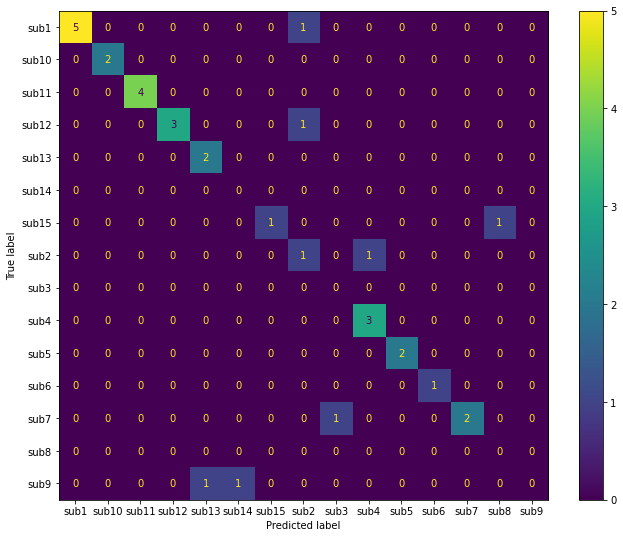

In [16]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)

plt.rcParams["figure.figsize"] = (11,9)
disp.plot()
plt.show()

> #### We print the accuracy score as well.

In [17]:

print ("Simple PCA test Accuracy in % : ", accuracy_score(y_test.flatten(), y_pred_test)*100)

test_scores.append(accuracy_score(y_test.flatten(), y_pred_test)*100)

Simple PCA test Accuracy in % :  78.78787878787878


> #### We then repeat the procedure for the train dataset.

In [18]:
#X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True ,random_state=42)

In [19]:

pca = PCA(n_components =9)
 
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.31292497, 0.14856935, 0.09135079, 0.07589587, 0.04415997,
       0.04047294, 0.0289226 , 0.02365686, 0.02328983])

In [20]:
classifier = LogisticRegression(random_state = 42,solver='lbfgs', max_iter=10000)
classifier.fit(X_train2, y_train.flatten())
y_pred_train = classifier.predict(X_train2)

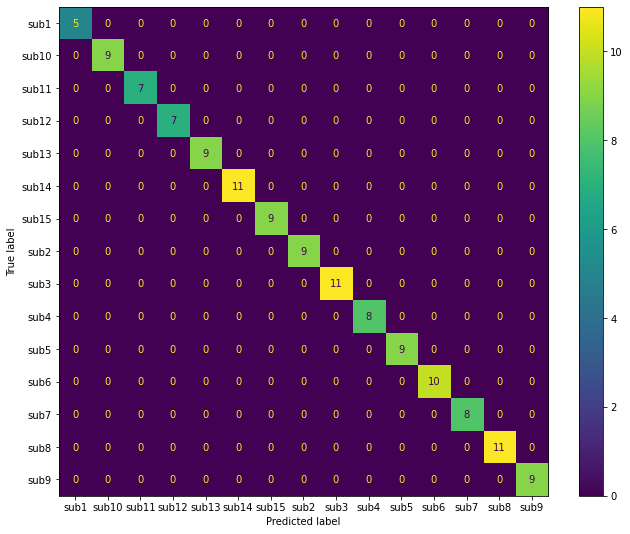

In [21]:
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)

plt.rcParams["figure.figsize"] = (11,9)
disp.plot()
plt.show()

In [22]:
print ("Simple PCA train Accuracy in % : ", accuracy_score(y_train.flatten(), y_pred_train)*100)
train_scores.append(accuracy_score(y_train.flatten(), y_pred_train)*100)

Simple PCA train Accuracy in % :  100.0


> #### Now we implement the Kernel PCA  using the logistic regression as well.

In [23]:
kpca = KernelPCA(kernel ='rbf', n_components=9)
 
X_train3= kpca.fit_transform(X_train)
X_test3 = kpca.transform(X_test)


> #### We implement the Logistic regression classifier and we apply the model to get the prdiction and compare it with our test dataset.

In [24]:
classifier = LogisticRegression(random_state = 42,solver='lbfgs', max_iter=10000)
classifier.fit(X_train3, y_train.flatten())
y_pred_test = classifier.predict(X_test3)

> #### Creation of the confusion matrix to "visualize" the results

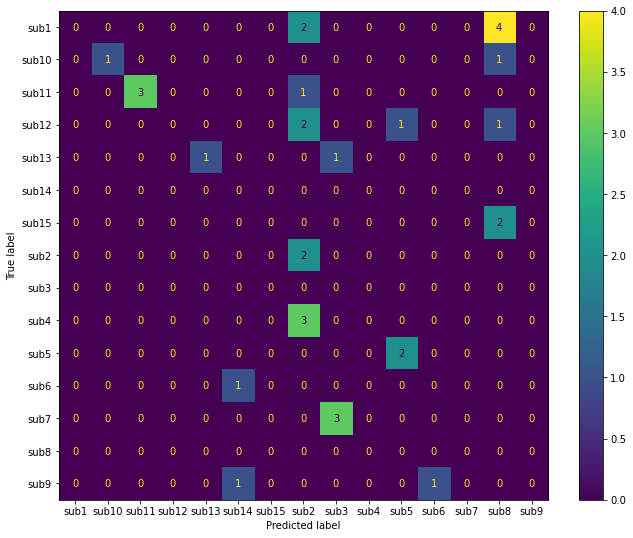

In [25]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)

plt.rcParams["figure.figsize"] = (11,9)
disp.plot()
plt.show()

> #### We print the accuracy score as well.

In [26]:

print ("Kernel PCA test Accuracy in % : ", accuracy_score(y_test.flatten(), y_pred_test)*100)
test_scores.append(accuracy_score(y_test.flatten(), y_pred_test)*100)

Kernel PCA test Accuracy in % :  27.27272727272727


> #### We then repeat the procedure (for kernel PCA) for the train dataset.

In [27]:
#X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True ,random_state=42)

In [28]:
kpca = KernelPCA(kernel ='rbf', n_components=9)
 
X_train4= kpca.fit_transform(X_train)
X_test4 = kpca.transform(X_test)

In [29]:
classifier = LogisticRegression(random_state = 42,solver='lbfgs', max_iter=10000)
classifier.fit(X_train4, y_train.flatten())
y_pred_train = classifier.predict(X_train4)

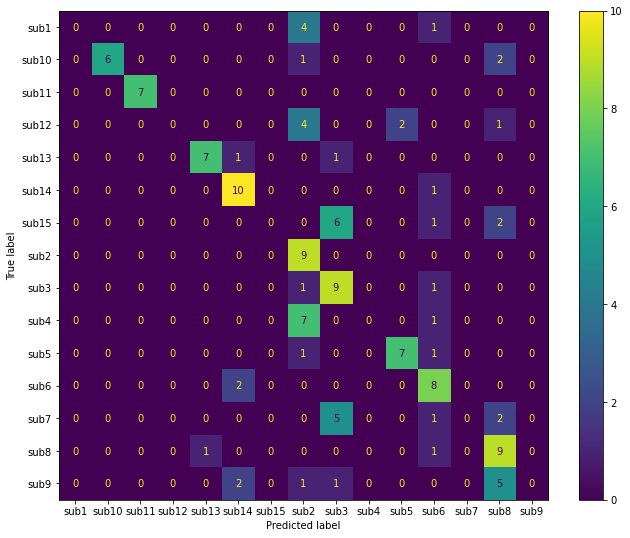

In [30]:
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)

plt.rcParams["figure.figsize"] = (11,9)
disp.plot()
plt.show()

In [31]:

print ("Kernel PCA train Accuracy in %: ", accuracy_score(y_train.flatten(), y_pred_train)*100)
train_scores.append(accuracy_score(y_train.flatten(), y_pred_train)*100)

Kernel PCA train Accuracy in %:  54.54545454545454


> #### Now we implement the kernel (Gaussian) PCA method for the processed dataset (test data).
> #### We try different number of components (n=100) though to try and get better results.

In [32]:
#X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True ,random_state=42)

kpca = KernelPCA(kernel ='rbf', n_components=100)
 
X_train5= kpca.fit_transform(X_train)
X_test5 = kpca.transform(X_test)
 
#explained_variance = kpca.explained_variance_ratio_

In [33]:
classifier = LogisticRegression(random_state = 42,solver='lbfgs', max_iter=10000)
classifier.fit(X_train5, y_train.flatten())
y_pred_test  = classifier.predict(X_test5)

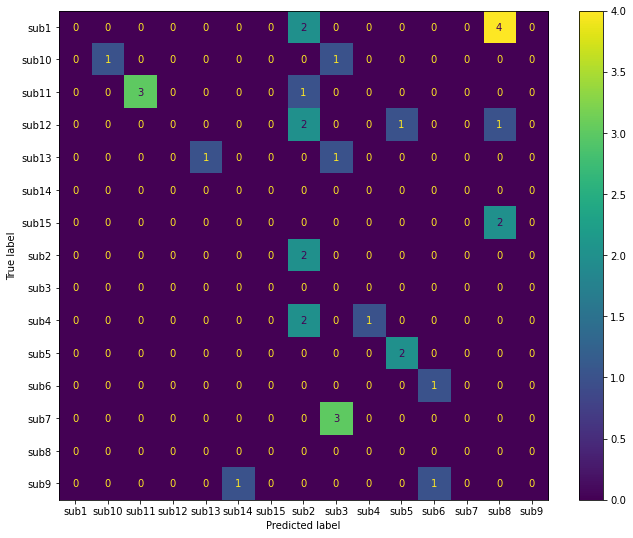

In [34]:
cm = confusion_matrix(y_test.flatten(), y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)

plt.rcParams["figure.figsize"] = (11,9)
disp.plot()
plt.show()

In [35]:
from sklearn.metrics import accuracy_score
print ("Kernel PCA test Accuracy in % : ", accuracy_score(y_test.flatten(), y_pred_test)*100)
test_scores.append(accuracy_score(y_test.flatten(), y_pred_test)*100)

Kernel PCA test Accuracy in % :  33.33333333333333


> #### Now we implement the kernel (Gaussian) PCA method for the processed dataset (train data).

In [36]:
#X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True ,random_state=42)

kpca = KernelPCA(kernel ='rbf', n_components=100)
 
X_train6= kpca.fit_transform(X_train)
X_test6 = kpca.transform(X_test)
 
#explained_variance = kpca.explained_variance_ratio_

In [37]:
classifier = LogisticRegression(random_state = 42,solver='lbfgs', max_iter=10000)
classifier.fit(X_train6, y_train.flatten())
y_pred_train  = classifier.predict(X_train6)

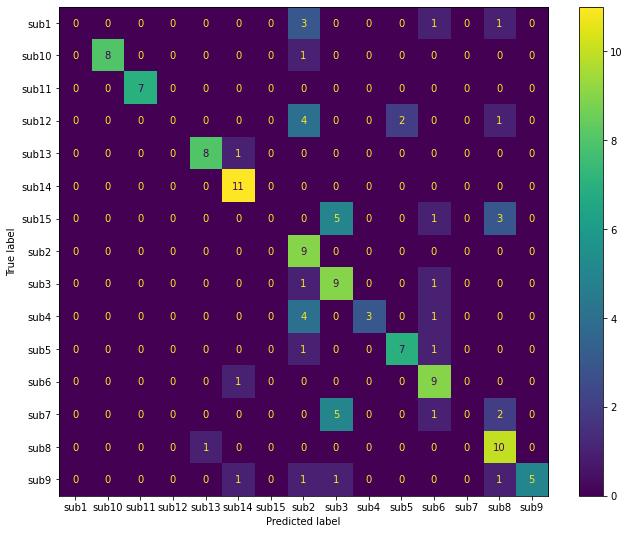

In [38]:
cm = confusion_matrix(y_train.flatten(), y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)

plt.rcParams["figure.figsize"] = (11,9)
disp.plot()
plt.show()

In [39]:
from sklearn.metrics import accuracy_score
print ("Kernel PCA train Accuracy (in %) : ", accuracy_score(y_train.flatten(), y_pred_train)*100)
train_scores.append(accuracy_score(y_train.flatten(), y_pred_train)*100)

Kernel PCA train Accuracy (in %) :  65.15151515151516


> #### We create the simple PCA and Kernel PCA function so we can use them faster for other classifier implementations

In [40]:
def simplePCA (x,y):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True ,random_state=42)
    pca = PCA(n_components =9)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    explained_variance = pca.explained_variance_ratio_
    return X_train,X_test

def gkernel_PCA (x,y):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True ,random_state=42)
    kpca = KernelPCA(kernel ='rbf', n_components=9)
    X_train= kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    return X_train,X_test

> #### Now we will try to implement other linear classifiers for investigating and finding better accuracy results.
> #### Firstly we implement the naive Bayes classifier.

In [41]:
X_train, X_test = simplePCA(x,y)
gnb = GaussianNB()
gnb.fit(X_train, y_train.flatten())
 
# making predictions on the testing set
y_pred_test = gnb.predict(X_test)

# making predictions on the train set
y_pred_train  = gnb.predict(X_train)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model, with simple PCA test accuracy(in %):", metrics.accuracy_score(y_test.flatten(), y_pred_test)*100)
print("Gaussian Naive Bayes model, with simple PCA train accuracy(in %):", metrics.accuracy_score(y_train.flatten(), y_pred_train)*100)

test_scores.append(accuracy_score(y_test.flatten(), y_pred_test)*100)
train_scores.append(accuracy_score(y_train.flatten(), y_pred_train)*100)

Gaussian Naive Bayes model, with simple PCA test accuracy(in %): 51.515151515151516
Gaussian Naive Bayes model, with simple PCA train accuracy(in %): 81.81818181818183


In [42]:
X_train, X_test = gkernel_PCA(x,y)
gnb = GaussianNB()
gnb.fit(X_train, y_train.flatten())
 
# making predictions on the testing set
y_pred_test = gnb.predict(X_test)

# making predictions on the train set
y_pred_train  = gnb.predict(X_train)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model, with kernel PCA test accuracy(in %):", metrics.accuracy_score(y_test.flatten(), y_pred_test)*100)
print("Gaussian Naive Bayes model, with kernel PCA train accuracy(in %):", metrics.accuracy_score(y_train.flatten(), y_pred_train)*100)
test_scores.append(accuracy_score(y_test.flatten(), y_pred_test)*100)
train_scores.append(accuracy_score(y_train.flatten(), y_pred_train)*100)

Gaussian Naive Bayes model, with kernel PCA test accuracy(in %): 48.484848484848484
Gaussian Naive Bayes model, with kernel PCA train accuracy(in %): 78.78787878787878


> #### Then we implement the stohastic gradient descent classification method.

In [43]:
X_train, X_test = simplePCA(x,y)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train.flatten())
y_pred_test= sgd.predict(X_test)

# making predictions on the train set
y_pred_train  = sgd.predict(X_train)

from sklearn import metrics
print("SGD model, with simple PCA test accuracy(in %):", metrics.accuracy_score(y_test.flatten(), y_pred_test)*100)
print("SGD model, with simple PCA train accuracy(in %):", metrics.accuracy_score(y_train.flatten(), y_pred_train)*100)
test_scores.append(accuracy_score(y_test.flatten(), y_pred_test)*100)
train_scores.append(accuracy_score(y_train.flatten(), y_pred_train)*100)

SGD model, with simple PCA test accuracy(in %): 33.33333333333333
SGD model, with simple PCA train accuracy(in %): 49.24242424242424


In [44]:
X_train, X_test = gkernel_PCA(x,y)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train.flatten())
y_pred_test = sgd.predict(X_test)

# making predictions on the train set
y_pred_train  = sgd.predict(X_train)
from sklearn import metrics
print("SGD model, with kernel PCA test accuracy(in %):", metrics.accuracy_score(y_test.flatten(), y_pred_test)*100)
print("SGD model, with kernel PCA train accuracy(in %):", metrics.accuracy_score(y_train.flatten(), y_pred_train)*100)
test_scores.append(accuracy_score(y_test.flatten(), y_pred_test)*100)
train_scores.append(accuracy_score(y_train.flatten(), y_pred_train)*100)

SGD model, with kernel PCA test accuracy(in %): 39.39393939393939
SGD model, with kernel PCA train accuracy(in %): 56.060606060606055


In [45]:
X_train, X_test = simplePCA(x,y)
#X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True ,random_state=42)

clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit_transform(X_train, y_train.flatten())
y_pred_test = clf_lda.predict(X_test)

# making predictions on the train set
y_pred_train  = clf_lda.predict(X_train)
print("Linear Discriminant Analysis model, with simple PCA test accuracy(in %):", metrics.accuracy_score(y_test.flatten(), y_pred_test)*100)
print("Linear Discriminant Analysis model, with simple PCA train accuracy(in %):", metrics.accuracy_score(y_train.flatten(), y_pred_train)*100)
test_scores.append(accuracy_score(y_test.flatten(), y_pred_test)*100)
train_scores.append(accuracy_score(y_train.flatten(), y_pred_train)*100)

Linear Discriminant Analysis model, with simple PCA test accuracy(in %): 75.75757575757575
Linear Discriminant Analysis model, with simple PCA train accuracy(in %): 87.87878787878788


In [46]:
X_train, X_test = gkernel_PCA(x,y)
#X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True ,random_state=42)

clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit_transform(X_train, y_train.flatten())
y_pred_test = clf_lda.predict(X_test)

# making predictions on the train set
y_pred_train  = clf_lda.predict(X_train)

print("Linear Discriminant Analysis model, with kernel PCA test accuracy(in %):", metrics.accuracy_score(y_test.flatten(), y_pred_test)*100)
print("Linear Discriminant Analysis model, with kernel PCA train accuracy(in %):", metrics.accuracy_score(y_train.flatten(), y_pred_train)*100)
test_scores.append(accuracy_score(y_test.flatten(), y_pred_test)*100)
train_scores.append(accuracy_score(y_train.flatten(), y_pred_train)*100)

Linear Discriminant Analysis model, with kernel PCA test accuracy(in %): 69.6969696969697
Linear Discriminant Analysis model, with kernel PCA train accuracy(in %): 83.33333333333334


> #### Lastly we create a dataframe to display our results for each method and model we used.

In [47]:
test_scores_array=np.array(test_scores)
train_scores_array=np.array(train_scores)

scores_df=pd.DataFrame()
scores_df=scores_df.append(pd.DataFrame(test_scores_array).T)
scores_df=scores_df.append(pd.DataFrame(train_scores_array).T)
scores_df.columns=['PCA-n=9-logistic regression', 'kernel PCA-n=9-logistic regression', 'kernel PCA-n=100-logistic regression', 'PCA-n=9-Naive Bayes', 'kernel PCA-n=9-Naive Bayes','PCA-n=9-SGD','kernel PCA-n=9-SGD'
                              ,'PCA-n=9-LinearDiscriminantAnalysis','kernel PCA-n=9-LinearDiscriminantAnalysis']

input_for_df=['Test', 'Training']
scores_df['train/test_dataset']=input_for_df
scores_df.set_index('train/test_dataset',inplace=True)
scores_df

,PCA-n=9-logistic regression,kernel PCA-n=9-logistic regression,kernel PCA-n=100-logistic regression,PCA-n=9-Naive Bayes,kernel PCA-n=9-Naive Bayes,PCA-n=9-SGD,kernel PCA-n=9-SGD,PCA-n=9-LinearDiscriminantAnalysis,kernel PCA-n=9-LinearDiscriminantAnalysis
train/test_dataset,,,,,,,,,
Test,78.787879,27.272727,33.333333,51.515152,48.484848,33.333333,39.393939,75.757576,69.696970
Training,100.000000,54.545455,65.151515,81.818182,78.787879,49.242424,56.060606,87.878788,83.333333


#### From the analysis above and the additional ways of manipulating and treating our data we see that simple PCA gives maybe better results (than kernel Gaussian). This could be explained partialy from the fact that the dataset used is not comparable to the one given in the paper we had as a reference.
#### Also the data maybe are arranged in a way that a linear orientation or space could be better describe them

#### We could also try further to improve our models by changing and tuning the hyper-parameters. Already by changing some parameters we noticed better results in our previous implementations. 
#### Thus we could implement a grid search function for that scope, for finding the best parameters, although this implementation deviates from the scope of this assignment. 